In [8]:
# Impor tensorflow and numpy
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math as m
import time
# For validation
from sklearn.metrics import confusion_matrix
import itertools



# For plotting
from matplotlib import pyplot as plt

# Add the library to the system path
import os,sys
se2cnn_source =  os.path.join(os.getcwd(),'..')
if se2cnn_source not in sys.path:
    sys.path.append(se2cnn_source)

# Import the library
import se2cnn.layers

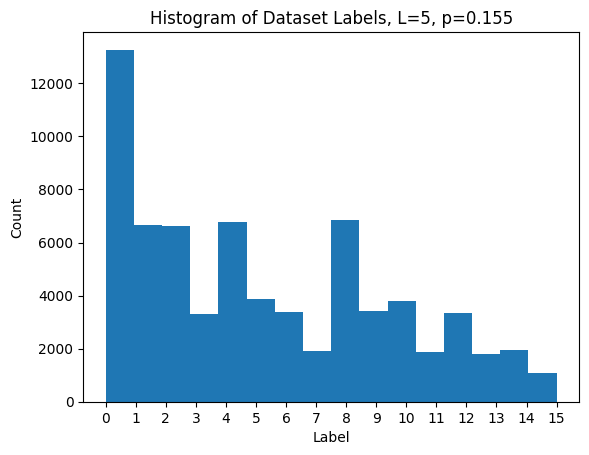

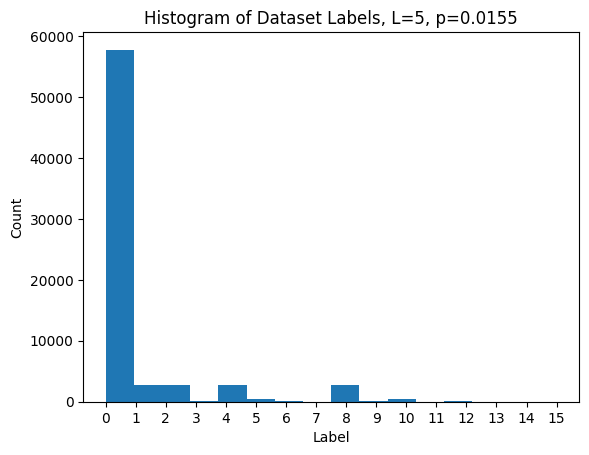

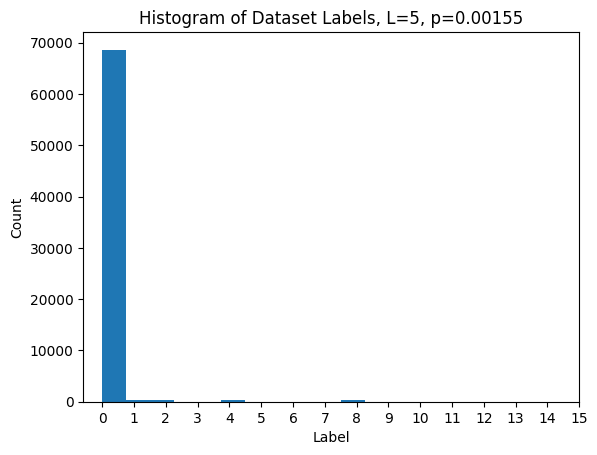

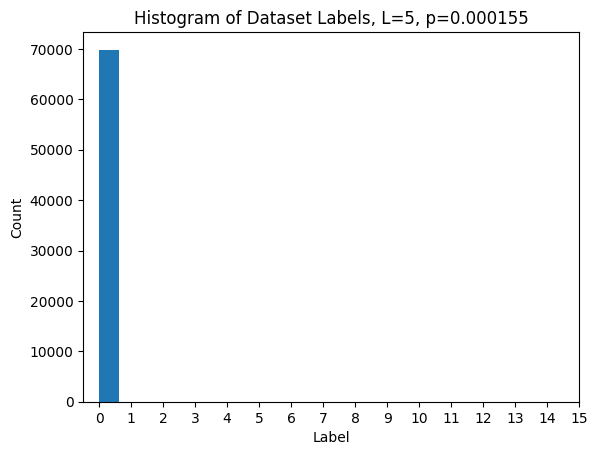

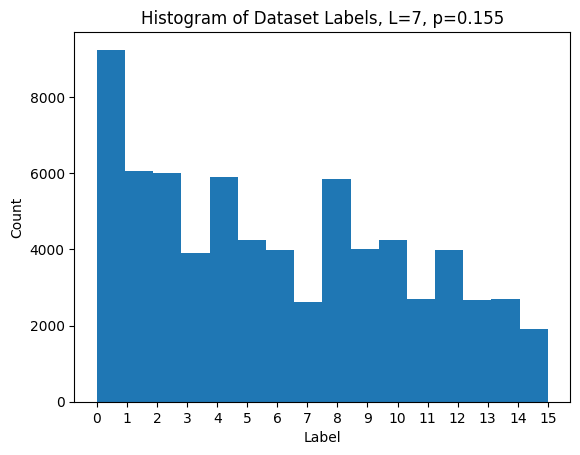

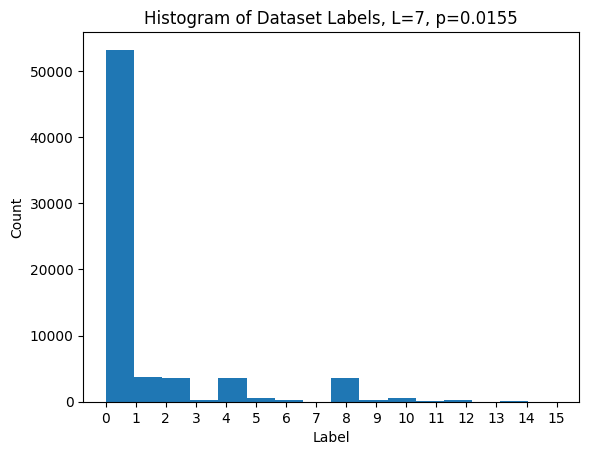

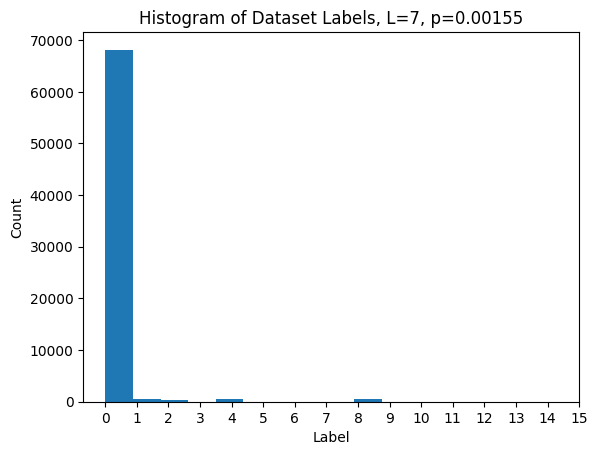

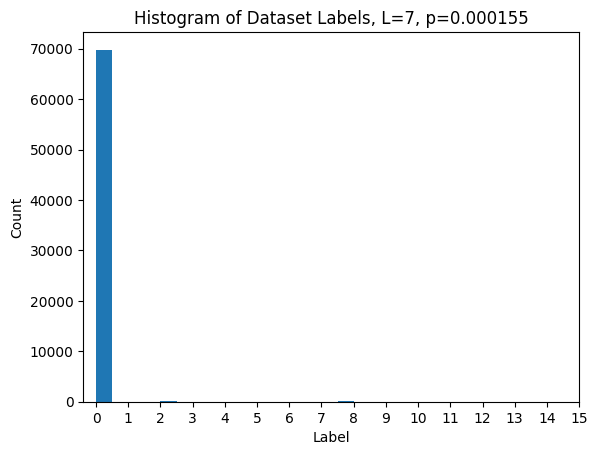

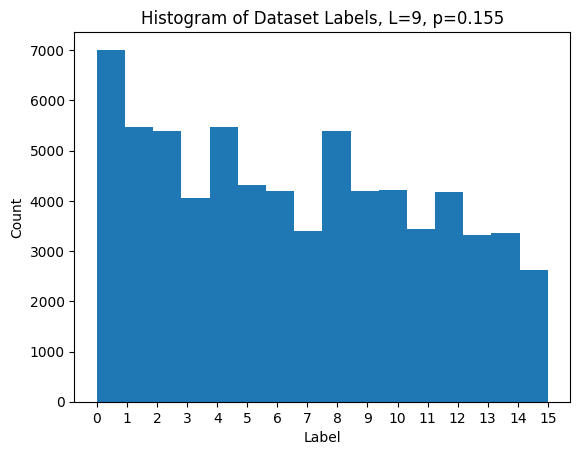

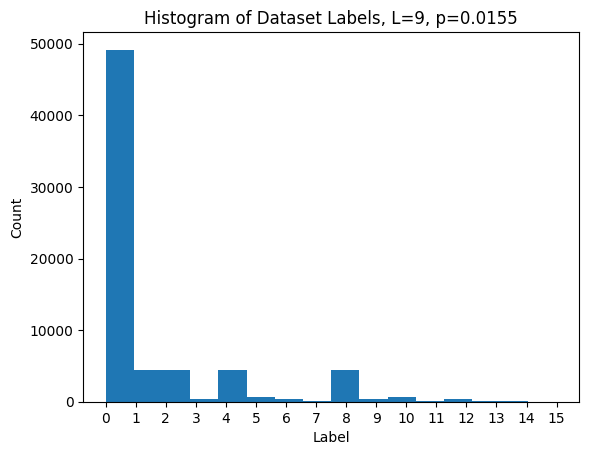

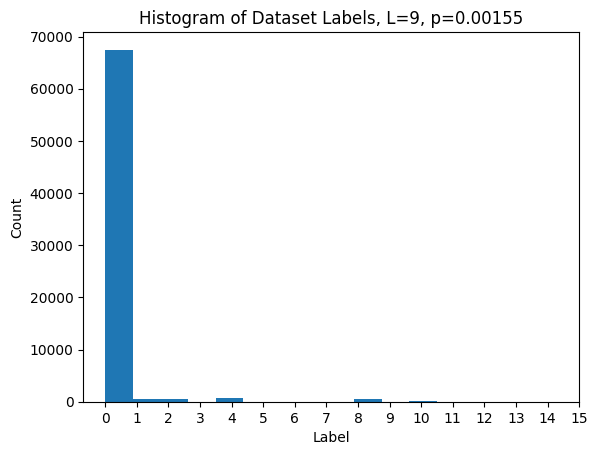

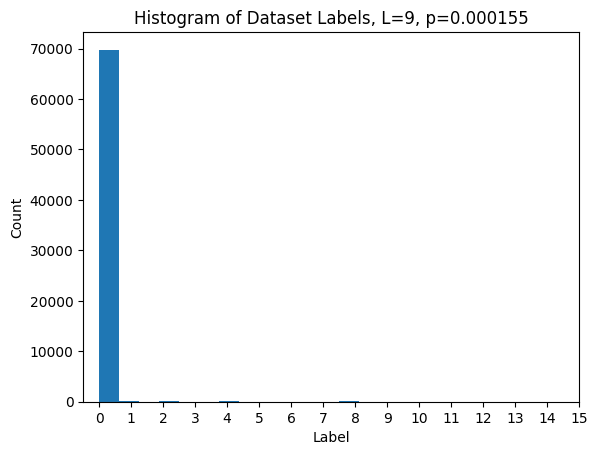

In [9]:
ds = [5,7,9]
er = [1,10,100,1000]

observations = 70000

for code_distance in ds:
    for error_rate in er:
        dataset = np.load(f'test-datasets/HL_data_{code_distance}_{error_rate}_{observations}.npy')

        nontest, test = np.split(dataset, [60000])

        nontest_data_unzipped = nontest[:, :code_distance**2 *2]
        # last 4 columns are the labels
        nontest_labels= nontest[:, -4:]

        test_data_unzipped = test[:, :code_distance**2 *2]
        test_labels= test[:, -4:]
        nontest_labels_encoded = np.array([int(''.join(map(str,single_label)),2) for single_label in nontest_labels])
        test_labels_encoded = np.array([int(''.join(map(str,single_label)),2) for single_label in test_labels])



        # histogram of nontest_labels_encoded

        dataset_encoded = np.concatenate((nontest_labels_encoded, test_labels_encoded))
        plt.title(f"Histogram of Dataset Labels, L={code_distance}, p={0.155/error_rate}")
        plt.hist(dataset_encoded, bins=16)
        # show all x ticks
        plt.xticks(np.arange(16))
        # axis labels
        plt.xlabel("Label")
        plt.ylabel("Count")

        plt.show()




